# Top2Vec ödev


## top2vec paketlerinin kurulması

In [ ]:
!pip install top2vec top2vec[sentence_encoders] top2vec[sentence_transformers] top2vec[indexing]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 104.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 79.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

## Paketlerin import edilmesi

In [ ]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
np.random.seed(0)

ModuleNotFoundError: ignored

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('turkish')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Verilerin okunması

* dosyalarımızın içerisinde ilk 2 satırdaki makale adı ve anahtar kelime ile başlayan satırları atlıyoruz

In [ ]:
import glob
files = glob.glob("makaleler/*.txt")

original_texts = []
for file in files:
  with open(file, "r") as f:
    rows = f.readlines()[2:]
    text = ''
    for row in rows:
      text += row
    original_texts.append(text)
print("makale sayisi: ",len(original_texts))
original_texts[0]

10


'\nVeri bilimi, özellikle büyük verinin ortaya çıkmasıyla\nbirlikte önemli hale gelmiş ve büyük verinin analiz\nedilmesindeki zorlukları çözmek için gerekli olan bir\ndizi disiplini barındırmaktadır. Veri biliminde ana\nunsurlar veri, teknolojiler ve insanlardır. Günümüzde\nveri her yerde bulunmakta ve artmasıyla birlikte büyük\nveri sorunuyla başa çıkmak için teknolojiler\ngeliştirilmektedir. İnsanlar özellikle sosyal medya ve\nakıllı telefon teknolojileri ile birlikte hem veri üreticisi\nhem de veri tüketicisi haline gelmiştir[1].\nBilgi işlem teknolojilerindeki gelişmeler ve verinin hızlı\nartması (akıllı telefonlar ve sosyal medya ile birlikte)\nveri bilimi kavramını öne çıkarmıştır. Büyük veriler,\nticari sorunları çözmek için hangi verilerin\nkullanılabileceğini/entegre edilebileceğini, sorunları\nçözmenin yeni yollarını ve daha önce çözemediğimiz\nyeni sorunları düşünme imkanı vermektedir. Büyük\nverileri yenilikçi bir şekilde kullanmanın bu yeni yoluna\nveri güdümlü paradigma d

## internetten indirdiğimiz makaleleri okuma

In [ ]:
files = glob.glob("makaleler_diger/*.txt")
original_texts_diger = []
for file in files:
    with open(file, "r") as dosya:
        original_texts_diger.append(dosya.read())
print("makale sayisi: ",len(original_texts_diger))
for text in original_texts_diger:
  print(text,"\n")

makale sayisi:  200
MIT ürünü Raptor Maps; güneş panellerinin bakımını geliştirmek için makine öğrenme yazılımı geliştirdi. Güneş enerji endüstrisi büyümektedir ancak hala bazı yetersizlikleri bulunmaktadır. Akıllı girişimciler bu yetersizlikleri iş fırsatı olarak görmekte ve çevrelerinde çözümler üretmeye çalışmaktadır.Endüstrinin çığır açan büyümesinden kaynaklanan en büyük komplikasyonlardan biri; güneş enerji çiftliklerinin bakımıdır. Tarihsel olarak; teknisyenlerin sorunları tanımlamak için güneş pillerinin rastgele bölümleri üzerinde elektriksel testler yapmışlardır. Son yıllarda, termal kameralarla donatılmış dronların kullanımı veri toplama hızını arttırdı. Ancak teknisyenlerden; hiç bitmeyen bir yapılandırılmamış veri akışını yorumlamaları isteniyor.Raptor Maps burada devreye giriyor. Şirketin yazılım görüntüleri dronlardan inceleniyor ve sorunları ayrı ayrı hücre seviyelerine kadar teşhis ediyor. Sistem aynı zamanda bulduğu her sorunla ilgili maliyetleri tahmin edebilir ve te

## Ön işleme adımı - verimizi ön işleme adımlarından geçiriyoruz.


In [ ]:
import re
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words("turkish")
def norm_doc(single_doc):
  single_doc = re.sub(" \d+", " ",single_doc)
  single_doc = re.sub(r"[{}]".format(",.;"), "" ,single_doc)
  single_doc = re.sub(r"\[", "" ,single_doc)
  single_doc = re.sub(r"\]", "" ,single_doc)
  single_doc = single_doc.lower()
  single_doc = single_doc.strip()
  #punctuations = [')','(',',',':','),',').','.','-',';','.,']
  single_doc = single_doc.replace("✓", "")


  tokens = WPT.tokenize(single_doc)
  filtered_tokens = [token for token in tokens if token not in stop_word_list]
  single_doc = ' '.join(filtered_tokens)
  return single_doc

* Yukarıda ön işleme adımları için yazdığımız fonksiyonu daha önce okumuş olduğumuz makalelere uygulayıp yeni bir listeye yüklüyoruz

In [ ]:
import pprint
temizlenmis_metinler = []
for text in original_texts:
    temizlenmis_metinler.append(norm_doc(text))
for metin in temizlenmis_metinler:
    pprint.pprint(metin)
    print("\n")

('veri bilimi özellikle büyük verinin ortaya çıkmasıyla birlikte önemli hale '
 'gelmiş büyük verinin analiz edilmesindeki zorlukları çözmek gerekli olan bir '
 'dizi disiplini barındırmaktadır veri biliminde ana unsurlar veri '
 'teknolojiler insanlardır günümüzde veri yerde bulunmakta artmasıyla birlikte '
 'büyük veri sorunuyla başa çıkmak teknolojiler geliştirilmektedir i ̇ nsanlar '
 'özellikle sosyal medya akıllı telefon teknolojileri birlikte veri üreticisi '
 'veri tüketicisi haline gelmiştir1 bilgi işlem teknolojilerindeki gelişmeler '
 'verinin hızlı artması ( akıllı telefonlar sosyal medya birlikte ) veri '
 'bilimi kavramını öne çıkarmıştır büyük veriler ticari sorunları çözmek hangi '
 'verilerin kullanılabileceğini / entegre edilebileceğini sorunları çözmenin '
 'yeni yollarını önce çözemediğimiz yeni sorunları düşünme imkanı vermektedir '
 'büyük verileri yenilikçi bir şekilde kullanmanın yeni yoluna veri güdümlü '
 'paradigma denilmektedir 2 büyük veri çağındaki veri so

In [ ]:
temizlenmis_metinler

NameError: ignored

## internetten indirdiğimiz makaleleri ön işlem adımlarından geçirelim

In [ ]:
temizlenmis_makaleler = []
for makale in makaleler:
    temizlenmis_makaleler.append(norm_doc(makale))

In [ ]:
len(temizlenmis_makaleler)

50

In [ ]:
from top2vec import Top2Vec
# embedding_model='universal-sentence-encoder'
model = Top2Vec(temizlenmis_makaleler,min_count=10,speed="learn",embedding_model='universal-sentence-encoder')

2023-06-18 12:15:20,033 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-06-18 12:15:22,084 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2023-06-18 12:15:46,488 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-06-18 12:15:47,151 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-06-18 12:15:50,167 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-06-18 12:15:50,187 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [ ]:
topic_sizes, topic_nums = model.get_topic_sizes()
print(topic_sizes)

[27 23]


## Konu Sayısını Görüntüleme

In [ ]:
model.get_num_topics()

2

## Her Konu İçin Anahtar Kelime Alma

---



In [ ]:
model.topic_words

array([['kadar', 'yok', 'bir', 'zaten', 'zaman', 'yeni', 'iyi', 'nedir',
        'saglıyor', 'olarak', 'kas', 'umut', 'bunu', 'zor', 'olur',
        'nternet', 'aga', 'dunya', 'hava', 'siber', 'veren', 'hayat',
        'kendi', 'soru', 'saat', 'temel', 'carbin', 'geri',
        'gokbilimciler', 'ona', 'gerekli', 'teknikler', 'egitmek',
        'etkiledigi', 'hala', 'esnek', 'buna', 'ini', 'yılda',
        'molekuler', 'yuzeye', 'alan', 'otomatik', 'eder', 'insan',
        'katmanının', 'bildirim', 'almak', 'iki', 'bes'],
       ['kadar', 'yok', 'zaman', 'bir', 'zaten', 'olur', 'yeni', 'kas',
        'iyi', 'katmanının', 'olarak', 'saglıyor', 'carbin', 'yonelik',
        'ona', 'tabanına', 'yapıyorlar', 'universitesi', 'faz', 'olası',
        'evrenin', 'azaltabilir', 'bilgisayara', 'alan', 'etmeyi',
        'kabul', 'islemek', 'vermek', 'nedir', 'bunu', 'jest', 'dunya',
        'saat', 'hayat', 'kamera', 'ila', 'kendine', 'egitmek', 'geri',
        'yorumlanması', 'teknikler', 'hala', 

In [ ]:
len(model.topic_words[1])

50

## Creating Topic Wordclouds

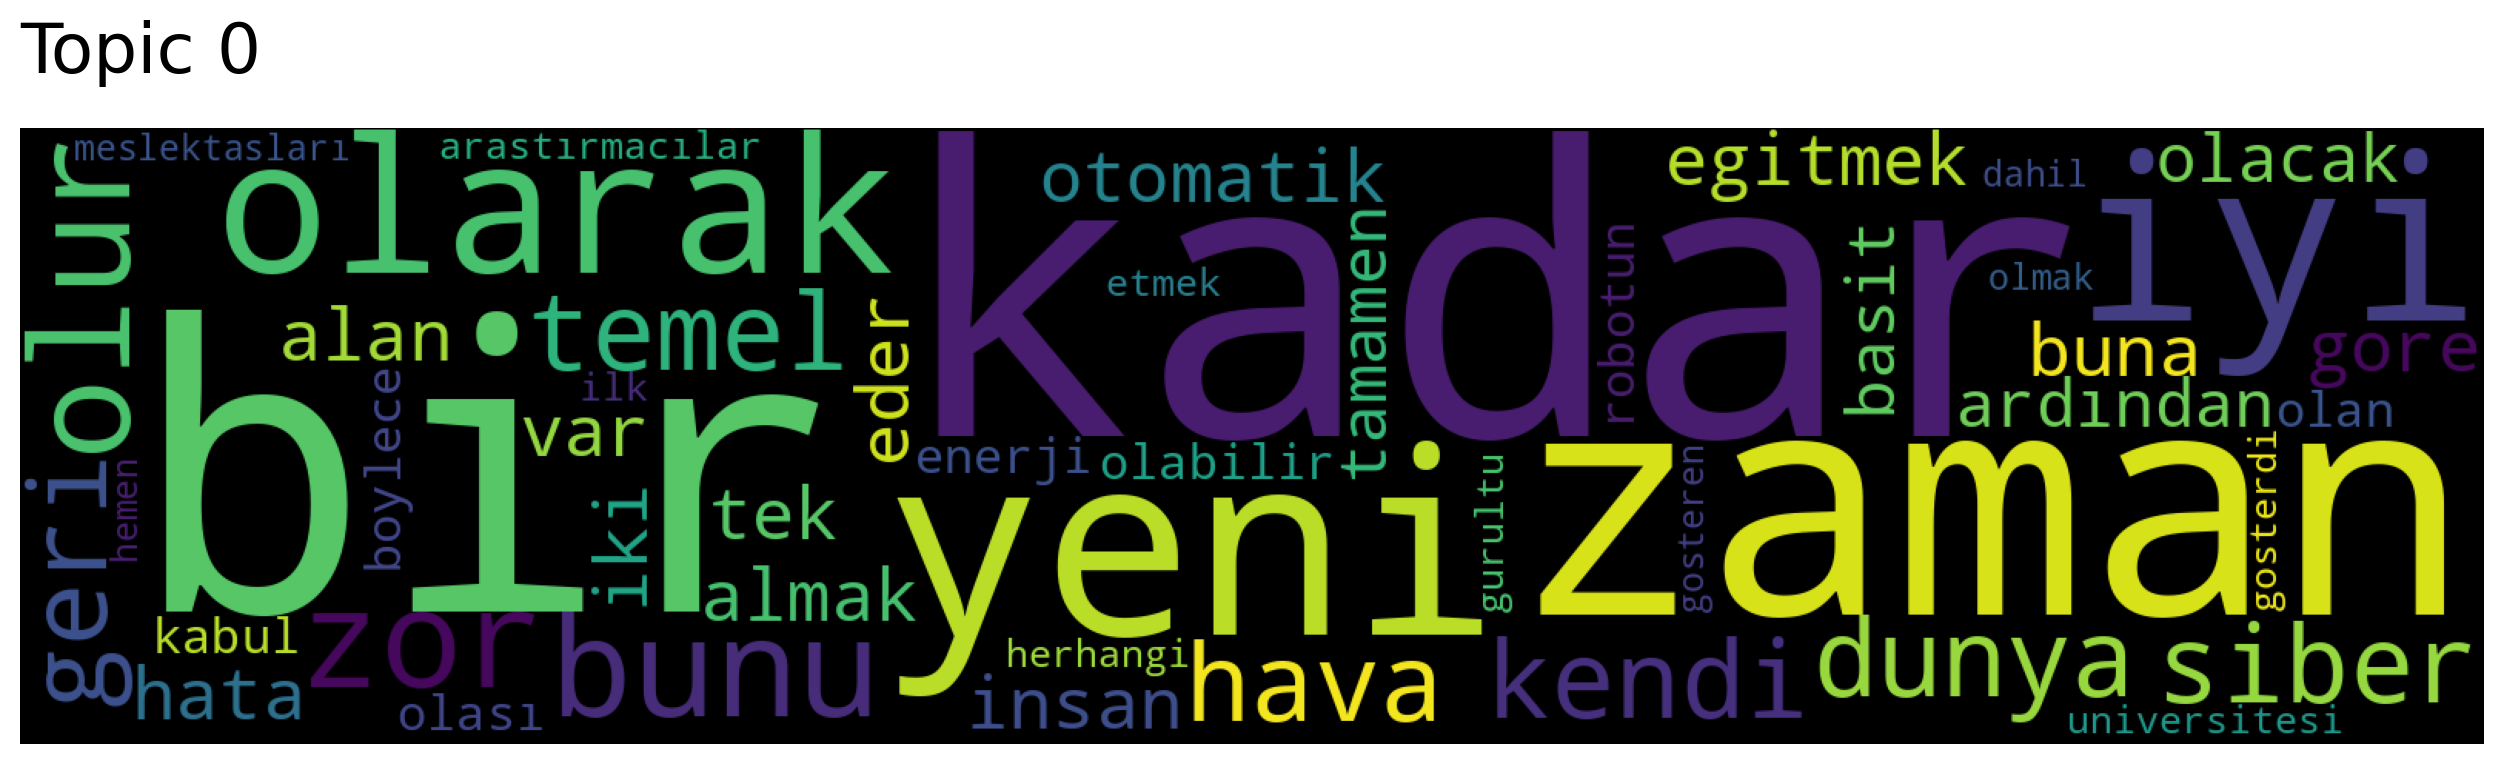

In [ ]:
model.generate_topic_wordcloud(0)

## Accessing Topic Vectors

In [ ]:
model.topic_vectors

array([[-0.05619317, -0.0585325 , -0.02156752, ..., -0.04009733,
        -0.04075787, -0.0604862 ],
       [ 0.03475176, -0.03074599, -0.00427477, ..., -0.02885598,
        -0.03659859, -0.05138885]], dtype=float32)

## Searching for Topics by Keyword

In [ ]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["zaman"], num_topics=2)

In [ ]:
topic_words, topic_scores

([array(['kadar', 'zaman', 'bir', 'olur', 'yeni', 'iyi', 'olarak',
         'universitesi', 'olası', 'alan', 'kabul', 'bunu', 'dunya',
         'egitmek', 'geri', 'arac', 'buna', 'insan', 'sahip', 'olan',
         'zeka', 'iki', 'ornegin', 'robotun', 'almak', 'basit', 'dahil',
         'gosteren', 'binlerce', 'boylece', 'bulmak', 'yaklasık',
         'herhangi', 'xai', 'kendi', 'buyuk', 'sistem', 'gurultu',
         'otomatik', 'temel', 'modelin', 'arastırmacılar', 'var',
         'elektronik', 'enerji', 'dusuk', 'bile', 'anda', 'gosterdi',
         'kucuk'], dtype='<U14'),
  array(['kadar', 'bir', 'zaman', 'yeni', 'iyi', 'olarak', 'bunu', 'zor',
         'olur', 'dunya', 'hava', 'siber', 'kendi', 'temel', 'geri',
         'egitmek', 'buna', 'alan', 'otomatik', 'eder', 'insan', 'almak',
         'iki', 'tek', 'gore', 'var', 'hata', 'olacak', 'ardından', 'basit',
         'tamamen', 'enerji', 'olan', 'boylece', 'olabilir', 'kabul',
         'olası', 'robotun', 'arastırmacılar', 'gurultu

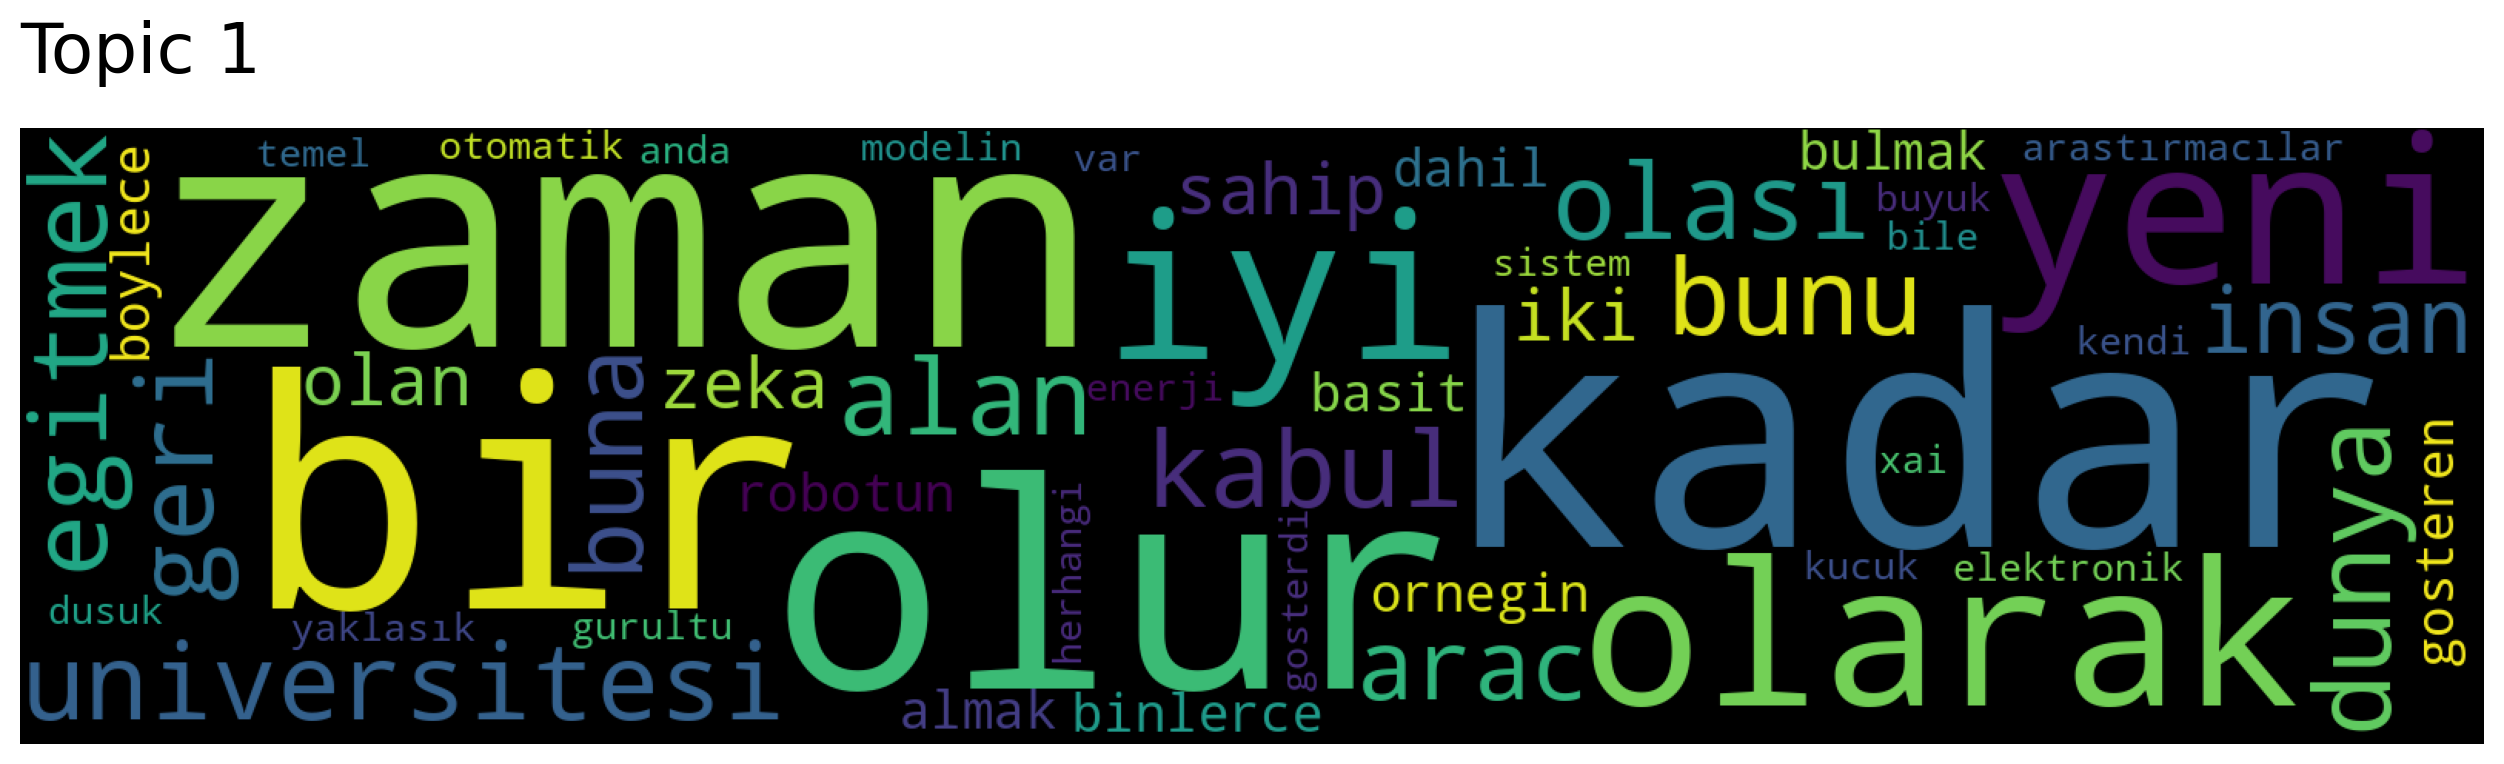

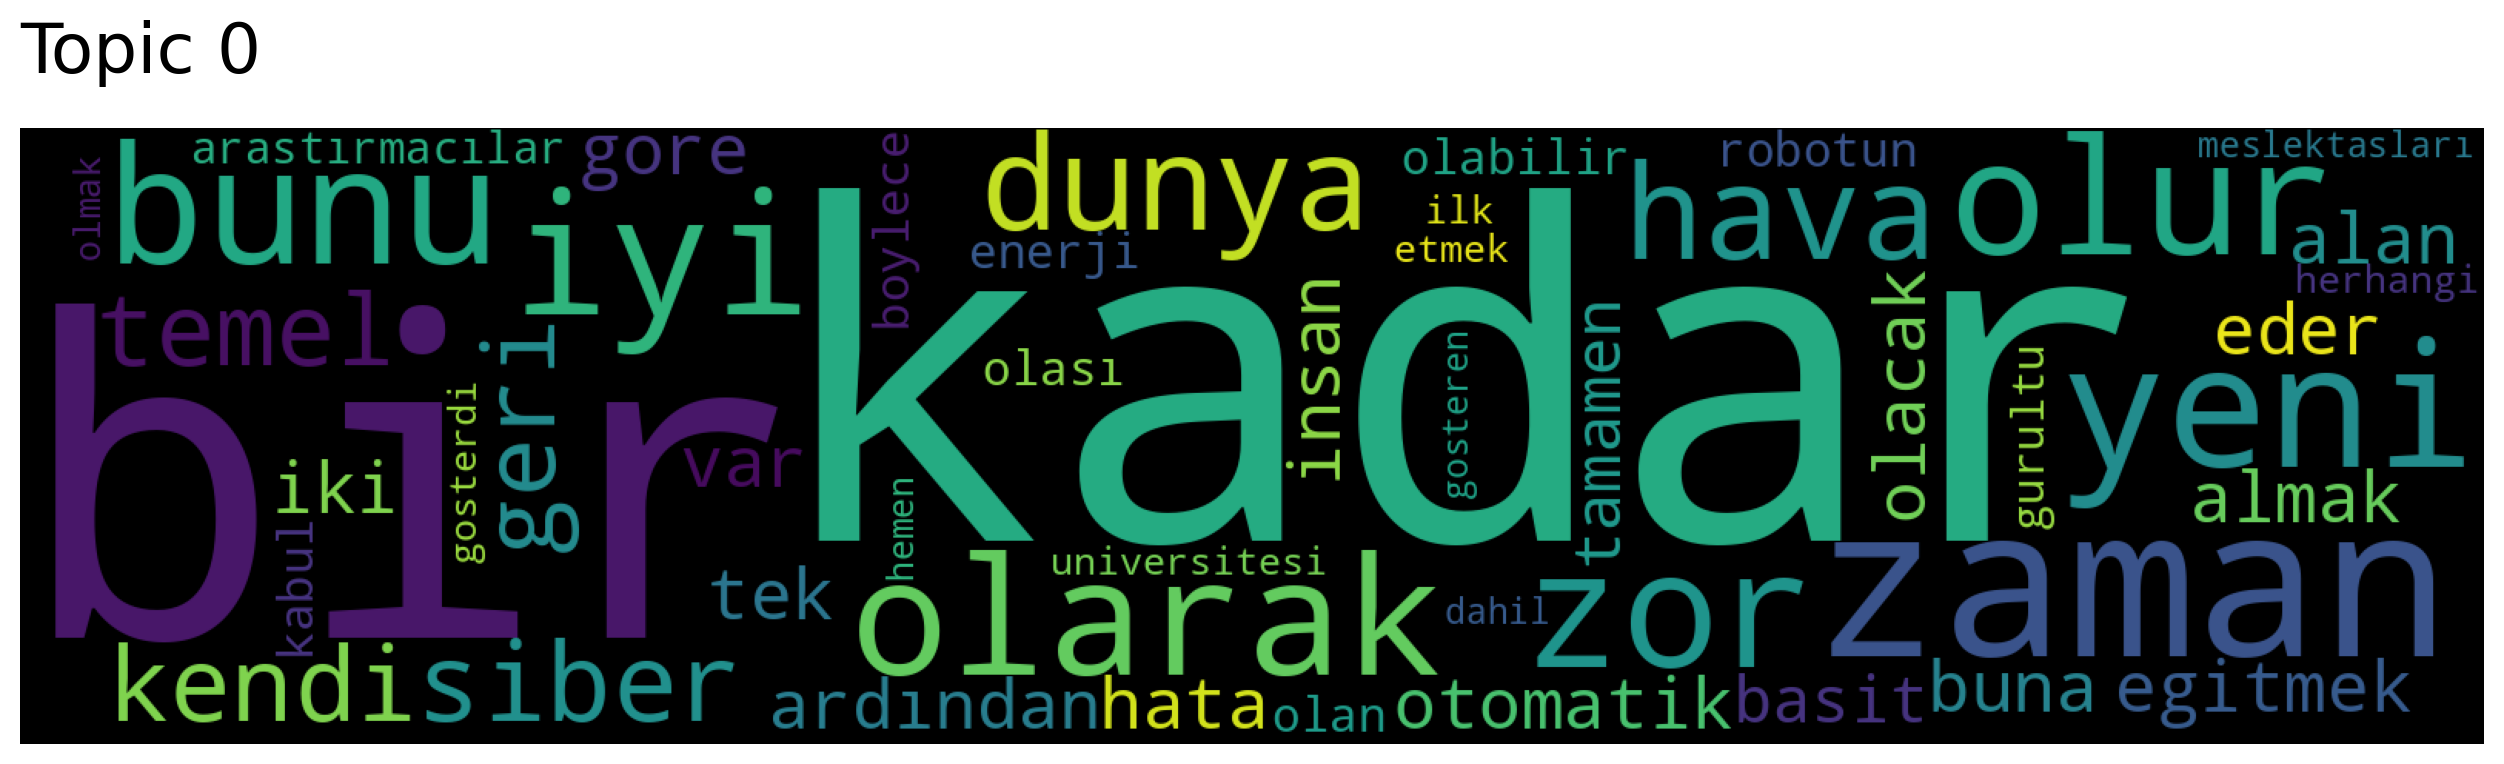

In [ ]:
for topic in topic_nums:
    model.generate_topic_wordcloud(topic)

In [ ]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["dil", "yapay","egitmek","dogal"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 446, Score: 0.16812714250299102
-----------
derin öğrenme günümüzde oldukça popüler olan yapay zekâ makine öğrenmesi alanlarının önemli güncel bir alt alanıdır derin öğrenme metotları genel olarak yapay sinir ağları ( ysa - artificial neural networks ) çalışmaları üzerine geliştirilmişlerdir ancak çalışmalardan farklı olarak fazla sayıda gizli nöron katman üzerine kuruludurlar ( ravì vd ) derin öğrenme eldeki verinin birden soyutlama seviyesinde temsil edilebilmesi birden işlem katmanı bulunan hesaplama modellerini kapsamaktadır ( bengio lecun vd 2015 ) derin ağlar olarak bilinen derin öğrenme yöntemlerinde verinin temsili üst üste olacak şekilde farklı katmanlar mevcuttur derin öğrenme yöntemleri ham verilerden etkin bir üst seviye soyutlaması yapmakla otomatik öznitelik kümeleri oluşturabilmekte böylelikle normalde çoğunlukla insanlar tarafından belirlenen özniteliklerin otomatik olarak çıkarılıp kullanılması sağlanmaktadır ( ravì vd ) derin öğrenme algoritmalarının öğrenme